# More Altair examples

Adapted from the official Altair documentation here: https://altair-viz.github.io/case_studies/exploring-weather.html

See also: https://altair-viz.github.io/gallery/index.html

Note the `pip install vega_datasets` requirement for getting access to the demo data. You can run that installation command in a JupyterLab terminal tab.

In [2]:
import pandas as pd
import altair as alt
alt.themes.enable('opaque') # ensures charts don't have a clear background

ThemeRegistry.enable('opaque')

In [3]:
df = pd.read_csv('../data/seattle-weather.csv')
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


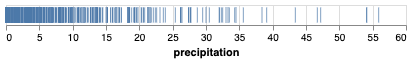

In [31]:
# Basic altair chart
# Encodes precipitation amounts with ticks along an x-axis
alt.Chart(df).mark_tick().encode(
    x='precipitation:Q', # matches column name
)

Note ':Q', which tells the tool what type of data is in the column (sometimes it can guess OK w/out this.
Options:
* `Q` - Quantitative (i.e. numbers)
* `N` - Nominal/categorical (e.g. the 'weather' column here - several different categories)
* `O` - Ordinal (categorical with an order, e.g. 'Gold', 'Silver', 'Bronze')
* `T` - Temporal (provides some tools for dealing with dates or time series data)

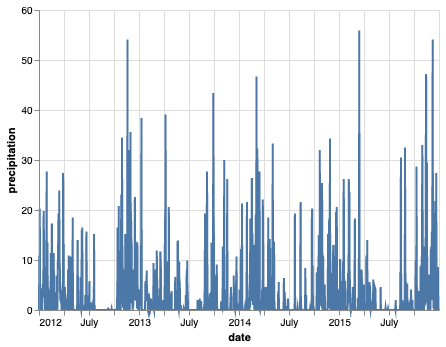

In [36]:
# Line chart - precipitation by day
alt.Chart(df).mark_line().encode(
    x='date:T', # Treat as temporal value
    y='precipitation'
)

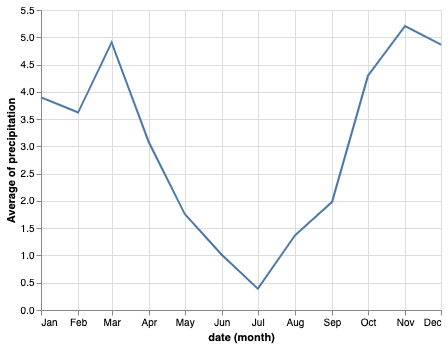

In [40]:
# Same thing except aggregated by date
alt.Chart(df).mark_line().encode(
    x='month(date):T', # month() groups dates by month
    y='average(precipitation)' # average takes average of precip values in month
)

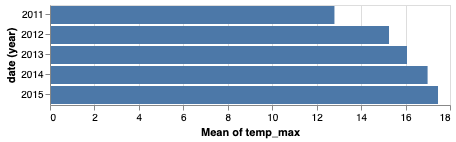

In [41]:
# Bar chart - avg temperature by year
alt.Chart(df).mark_bar().encode(
    x='mean(temp_max)',
    y='year(date):O'
)

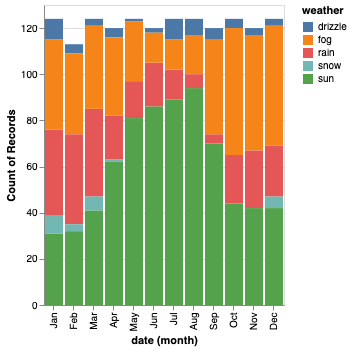

In [43]:
# Charting three fields at once - Months by days of particular weather types
alt.Chart(df).mark_bar().encode(
    x='month(date):N',
    y='count()',
    color='weather',
)

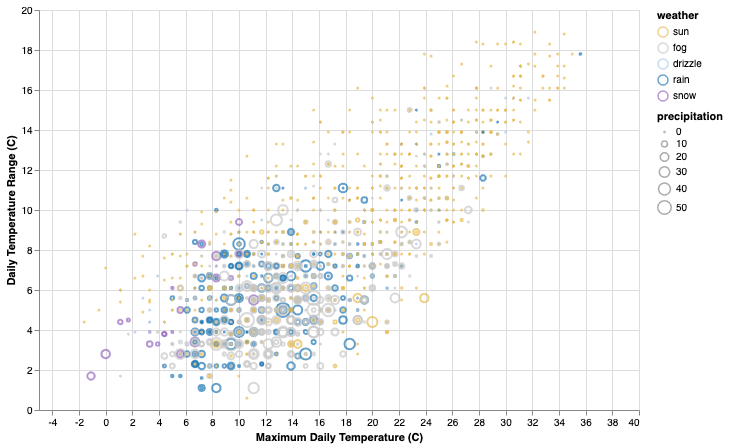

In [47]:
# More complicated plot
weather_type_color_scale = alt.Scale(
    domain=['sun', 'fog', 'drizzle', 'rain', 'snow'],
    range=['#e7ba52', '#c7c7c7', '#aec7e8', '#1f77b4', '#9467bd']
)

alt.Chart(df).mark_point().encode(
    alt.X('temp_max', title='Maximum Daily Temperature (C)'),
    alt.Y('temp_range:Q', title='Daily Temperature Range (C)'),
    alt.Color('weather', scale=weather_type_color_scale),
    alt.Size('precipitation', scale=alt.Scale(range=[1, 200]))
).transform_calculate(
    "temp_range", "datum.temp_max - datum.temp_min"
).properties(
    width=600,
    height=400
)